In [ ]:
import os
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
target_directory = '/content/'  # Update with your target directory
with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/IDS_project/archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall(target_directory)

In [99]:
df=pd.read_csv("/content/Instagram User Stats.csv")

In [100]:
df.head()

,id,pos,flr,flg,eg,er,fg,op
0,1,702,906,677,0.1891,6.070640,1.177860,14.8936
1,2,160,386,713,0.1950,6.260800,0.094127,16.9811
2,3,851,20400,3700,0.0664,0.717416,2.242440,38.2166
3,4,42,900,7500,0.0592,1.901230,7.643310,60.1626
4,5,50,486,4350,0.5112,16.409500,0.372900,61.9403


In [101]:
# Step 2: Find the minimum and maximum values in the entire tensor
min_value = df['er'].min()
max_value = df['er'].max()

# Step 3: Normalize the values using min-max scaling to get the values between 0 and 1
df['er'] = (df['er'] - min_value) / (max_value - min_value)

Apply threshold


In [102]:
df = df.drop(['flg','id'], axis=1)

In [103]:
df.head()

,pos,flr,eg,er,fg,op
0,702,906,0.1891,0.121413,1.177860,14.8936
1,160,386,0.1950,0.125216,0.094127,16.9811
2,851,20400,0.0664,0.014348,2.242440,38.2166
3,42,900,0.0592,0.038025,7.643310,60.1626
4,50,486,0.5112,0.328190,0.372900,61.9403


#### Apply threshold on followers

In [104]:
cleaned_data=df.copy()

In [105]:
min_threshold=5000
max_threshold=50000
# Create a new DataFrame with outliers
outliers_df = df[(df['flr'] < min_threshold) | (df['flr'] > max_threshold)]
# Use merge to find common rows
merged_df = pd.merge(cleaned_data, outliers_df, on=cleaned_data.columns.tolist(), how='left', indicator=True)
# Select rows that are only in the original dataset
result_df = merged_df[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1)
cleaned_data=result_df.copy()

In [106]:
cleaned_data = cleaned_data.reset_index(drop=True)
cleaned_data.head()

,pos,flr,eg,er,fg,op
0,851,20400,0.0664,0.014348,2.242440,38.2166
1,12,5700,0.2411,0.070877,-0.311591,49.0291
2,209,14800,0.0212,0.004580,1.170150,66.7774
3,71,14800,0.1068,0.023063,-0.569995,38.2716
4,1800,7800,0.1113,0.032725,6.388800,49.6826


In [107]:
# Print the outliers DataFrame
print("\nOutliers DataFrame:")
outliers_df.head()


Outliers DataFrame:


,pos,flr,eg,er,fg,op
0,702,906,0.1891,0.121413,1.177860,14.8936
1,160,386,0.1950,0.125216,0.094127,16.9811
3,42,900,0.0592,0.038025,7.643310,60.1626
4,50,486,0.5112,0.328190,0.372900,61.9403
5,24,991,0.0644,0.041372,0.313541,54.5455


#### Apply threshold on posts

In [108]:
pos_cleaned_data=cleaned_data.copy()

In [109]:
min_threshold=50
max_threshold=5500
# Create a new DataFrame with outliers
pos_outliers_df = df[(df['pos'] < min_threshold) | (df['pos'] > max_threshold)]
# Use merge to find common rows
merged_df = pd.merge(pos_cleaned_data, pos_outliers_df, on=pos_cleaned_data.columns.tolist(), how='left', indicator=True)
# Select rows that are only in the original dataset
result_df = merged_df[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1)
pos_cleaned_data=result_df.copy()

In [110]:
pos_cleaned_data

,pos,flr,eg,er,fg,op
0,851,20400,0.0664,0.014348,2.242440,38.2166
2,209,14800,0.0212,0.004580,1.170150,66.7774
3,71,14800,0.1068,0.023063,-0.569995,38.2716
4,1800,7800,0.1113,0.032725,6.388800,49.6826
5,3200,9600,0.0023,0.000683,0.559388,25.7143
...,...,...,...,...,...,...
2126,4500,5100,0.0516,0.015163,-0.362845,0.0000
2127,935,10100,1.0000,0.391816,10.000000,78.9161
2128,859,36100,0.5300,0.098572,3.589110,60.6838
2129,293,9200,0.0327,0.009614,2.578530,31.4961


In [111]:
# Print the combined outliers DataFrame
print("\nCombined Outliers DataFrame:")
pos_outliers_df.head()


Combined Outliers DataFrame:


,pos,flr,eg,er,fg,op
3,42,900,0.0592,0.038025,7.643310,60.1626
5,24,991,0.0644,0.041372,0.313541,54.5455
7,33,591,0.2726,0.175033,0.367900,54.4643
8,2,22,0.2832,0.181818,3.875970,100.0000
9,26,541,0.0688,0.044157,5.716300,69.8630


In [112]:
# Print the 'pos' outliers DataFrame
print("\n'pos' cleaned DataFrame:")
pos_cleaned_data.head()


'pos' cleaned DataFrame:


,pos,flr,eg,er,fg,op
0,851,20400,0.0664,0.014348,2.242440,38.2166
2,209,14800,0.0212,0.004580,1.170150,66.7774
3,71,14800,0.1068,0.023063,-0.569995,38.2716
4,1800,7800,0.1113,0.032725,6.388800,49.6826
5,3200,9600,0.0023,0.000683,0.559388,25.7143


Check data

In [113]:
max(pos_outliers_df['pos'])

30200

In [114]:
min(pos_outliers_df['pos'])

0

In [115]:
pos_cleaned_data.to_csv('/content/drive/MyDrive/Colab Notebooks/IDS_project/cleaned_dataset.csv', index=False)

### Split dataset

Work on genuine accounts for marketing

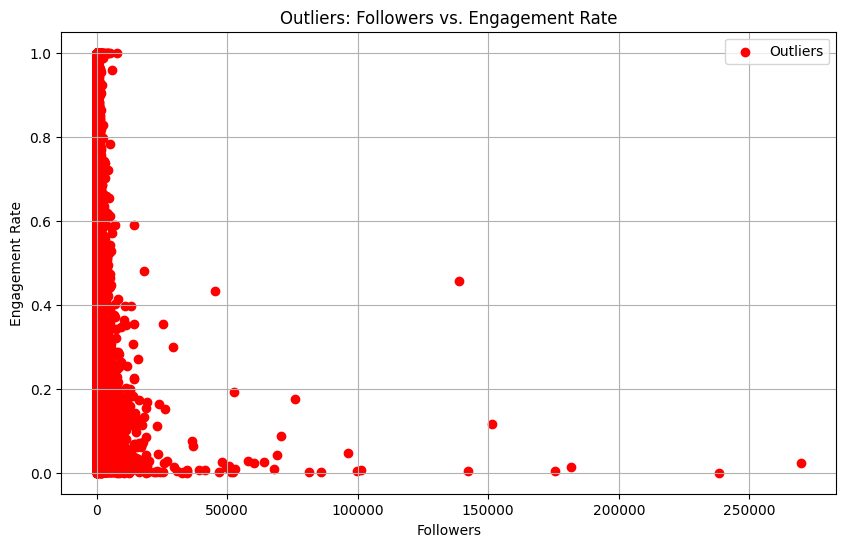

In [116]:
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pos_outliers_df['flr'], pos_outliers_df['er'], color='red', label='Outliers')
plt.title('Outliers: Followers vs. Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('Engagement Rate')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
pos_outliers_df = pos_outliers_df.drop('eg', axis=1)

In [118]:
pos_outliers_df.head()

,pos,flr,er,fg,op
3,42,900,0.038025,7.643310,60.1626
5,24,991,0.041372,0.313541,54.5455
7,33,591,0.175033,0.367900,54.4643
8,2,22,0.181818,3.875970,100.0000
9,26,541,0.044157,5.716300,69.8630


Save dataframe in CSV file

Select minimum range dataset

In [119]:
min_threshold=5000
# Create a new DataFrame with outliers
min_flr_outliers_df = pos_outliers_df[(pos_outliers_df['flr'] < min_threshold)]

In [120]:
min_flr_outliers_df.head()

,pos,flr,er,fg,op
3,42,900,0.038025,7.643310,60.1626
5,24,991,0.041372,0.313541,54.5455
7,33,591,0.175033,0.367900,54.4643
8,2,22,0.181818,3.875970,100.0000
9,26,541,0.044157,5.716300,69.8630


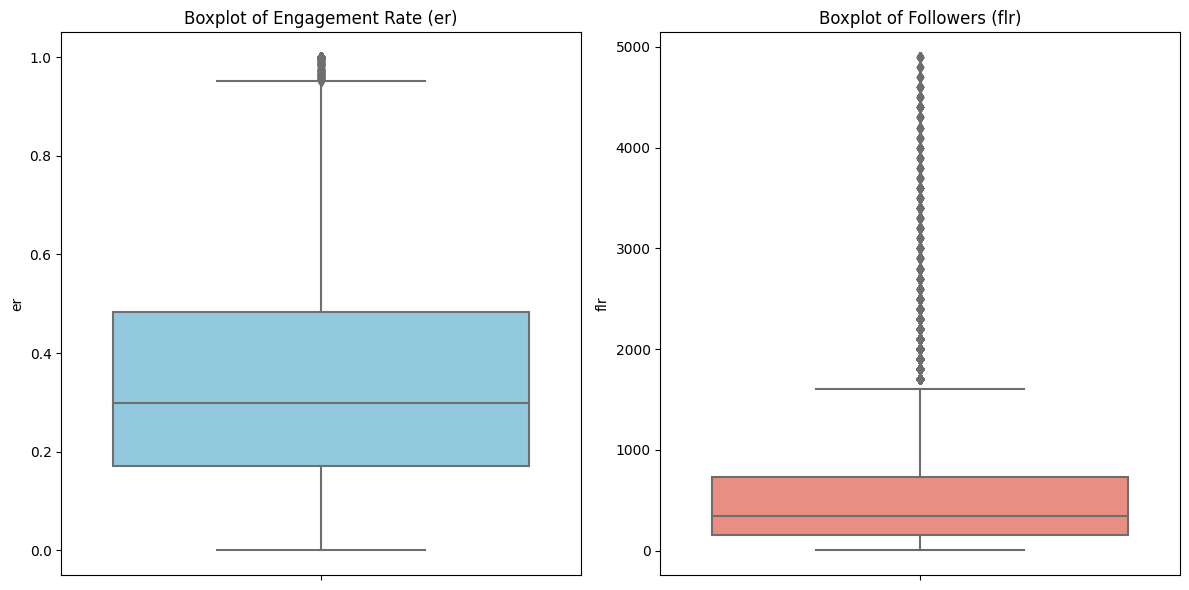

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a boxplot for 'er'
plt.subplot(1, 2, 1)
sns.boxplot(y='er', data=min_flr_outliers_df, color='skyblue')
plt.title('Boxplot of Engagement Rate (er)')

# Create a boxplot for 'flr'
plt.subplot(1, 2, 2)
sns.boxplot(y='flr', data=min_flr_outliers_df, color='salmon')
plt.title('Boxplot of Followers (flr)')

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()


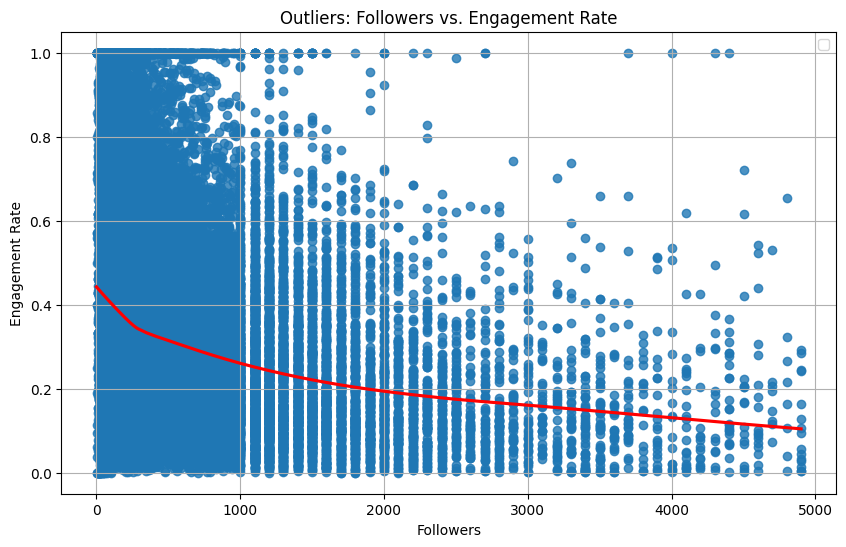

In [122]:
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=min_flr_outliers_df['flr'], y = min_flr_outliers_df['er'], lowess = True, scatter = True, line_kws = {"color":"red"} )
#plt.scatter(min_flr_outliers_df['flr'], min_flr_outliers_df['er'], color='red', label='Outliers')
plt.title('Outliers: Followers vs. Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('Engagement Rate')
plt.legend()
plt.grid(True)
plt.show()

In [123]:
max_threshold=50000
# Create a new DataFrame with outliers
max_flr_outliers_df = outliers_df[(outliers_df['flr'] > max_threshold)]

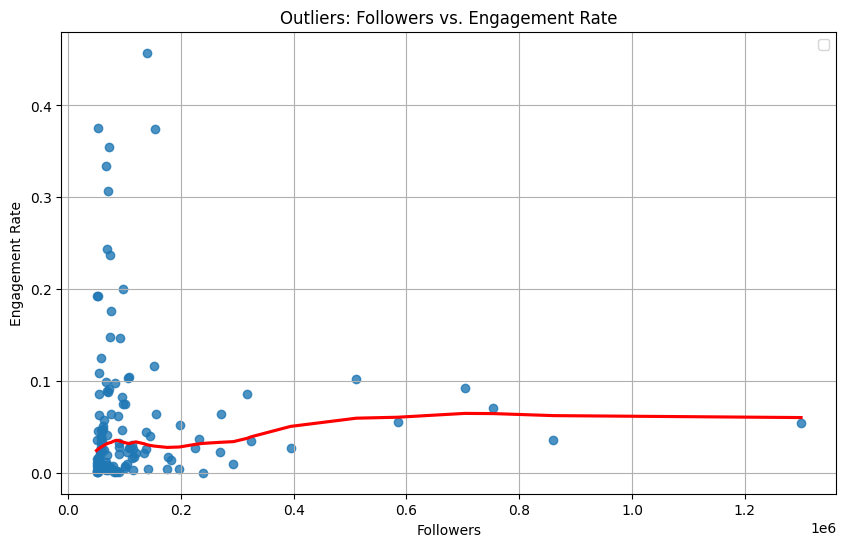

In [124]:
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=max_flr_outliers_df['flr'], y = max_flr_outliers_df['er'], lowess = True, scatter = True, line_kws = {"color":"red"} )
#plt.scatter(max_flr_outliers_df['flr'], max_flr_outliers_df['er'], color='red', label='Outliers')
plt.title('Outliers: Followers vs. Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('Engagement Rate')
plt.legend()
plt.grid(True)
plt.show()

In [125]:
max_flr_outliers_df.head()

,pos,flr,eg,er,fg,op
623,7800,81300,0.0070,0.001053,10.000000,15.1163
681,12500,99800,0.0349,0.005239,0.603475,12.9792
1605,195,109500,0.1888,0.028320,-0.599852,94.9059
3290,792,89600,0.0054,0.000805,1.433350,69.5313
3488,225,54500,0.1101,0.017168,-0.293593,74.3370


## Influencer:

In [126]:
max_flr_outliers_df = max_flr_outliers_df[max_flr_outliers_df['fg'] >= 0]
# If you want to reset the index after dropping rows
max_flr_outliers_df = max_flr_outliers_df.reset_index(drop=True)

In [127]:
max_flr_outliers_df['fg'].max()

10.0

In [128]:
# Step 2: Find the minimum and maximum values in the entire tensor
min_value = max_flr_outliers_df['fg'].min()
max_value = max_flr_outliers_df['fg'].max()

# Step 3: Normalize the values using min-max scaling to get the values between 0 and 1
max_flr_outliers_df['fg'] = (max_flr_outliers_df['fg'] - min_value) / (max_value - min_value)

In [129]:
max_flr_outliers_df['fg'].min()

0.0

In [130]:
max_flr_outliers_df['fg'].max()

1.0

In [131]:
len(max_flr_outliers_df)

89

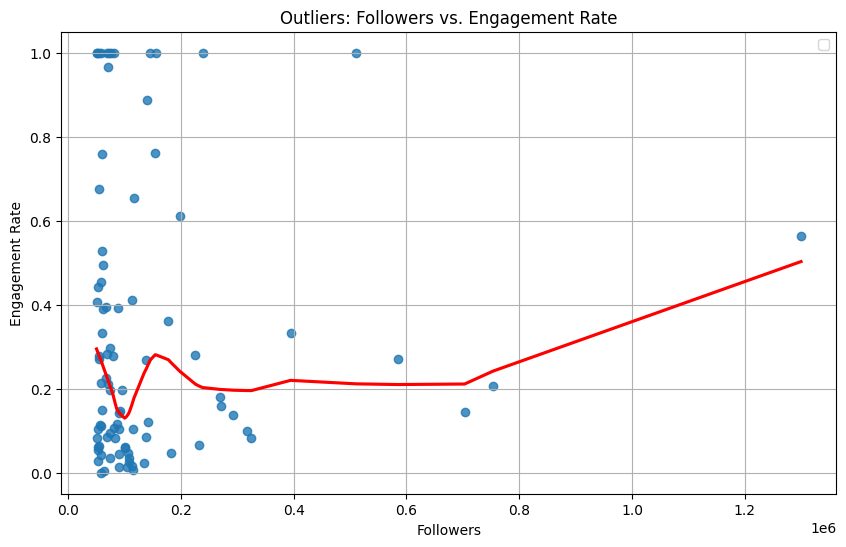

In [132]:
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=max_flr_outliers_df['flr'], y = max_flr_outliers_df['fg'], lowess = True, scatter = True, line_kws = {"color":"red"} )
#plt.scatter(max_flr_outliers_df['flr'], max_flr_outliers_df['er'], color='red', label='Outliers')
plt.title('Outliers: Followers vs. Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('Engagement Rate')
plt.legend()
plt.grid(True)
plt.show()

Check 'op' for private and public accounts

In [133]:
max_flr_outliers_df = max_flr_outliers_df[max_flr_outliers_df['op'] != 0]
# If you want to reset the index after dropping rows
max_flr_outliers_df = max_flr_outliers_df.reset_index(drop=True)

In [134]:
len(max_flr_outliers_df)

80

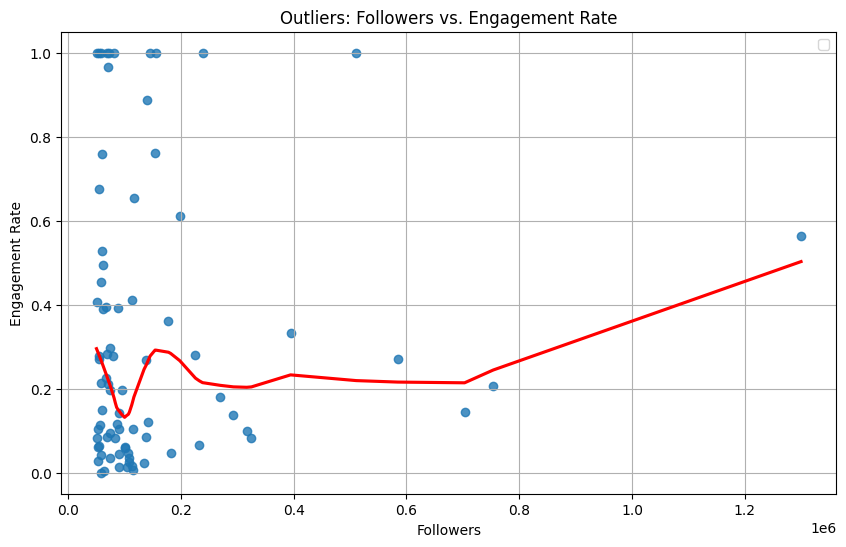

In [135]:
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=max_flr_outliers_df['flr'], y = max_flr_outliers_df['fg'], lowess = True, scatter = True, line_kws = {"color":"red"} )
#plt.scatter(max_flr_outliers_df['flr'], max_flr_outliers_df['er'], color='red', label='Outliers')
plt.title('Outliers: Followers vs. Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('Engagement Rate')
plt.legend()
plt.grid(True)
plt.show()

In [136]:
# Step 2: Find the minimum and maximum values in the entire tensor
min_value = max_flr_outliers_df['op'].min()
max_value = max_flr_outliers_df['op'].max()

# Step 3: Normalize the values using min-max scaling to get the values between 0 and 1
max_flr_outliers_df['op'] = (max_flr_outliers_df['op'] - min_value) / (max_value - min_value)

In [137]:
max_flr_outliers_df.head()

,pos,flr,eg,er,fg,op
0,7800,81300,0.0070,0.001053,1.000000,0.032082
1,12500,99800,0.0349,0.005239,0.060347,0.007713
2,792,89600,0.0054,0.000805,0.143335,0.652569
3,1900,83500,0.6526,0.097894,0.082306,0.205288
4,724,67900,0.5733,0.089428,0.281901,0.295180


#### K-Means based on clustering

In [138]:
decision_data=max_flr_outliers_df.copy()

In [167]:
import pandas as pd
from sklearn.cluster import KMeans

# Select features for clustering
features = ['pos','flr', 'er', 'fg', 'op']

# Normalize the features
decision_data_normalized = (decision_data[features] - decision_data[features].min()) / (decision_data[features].max() - decision_data[features].min())

# Apply k-means clustering
num_clusters = 2  # You can adjust this based on your domain knowledge
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
decision_data['cluster'] = kmeans.fit_predict(decision_data_normalized)

# Display the clusters
print(decision_data[['pos', 'cluster']])


      pos  cluster
0    7800        1
1   12500        0
2     792        0
3    1900        0
4     724        0
..    ...      ...
75    356        0
76    393        1
77   1500        0
78    216        1
79   1500        0

[80 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [168]:
# Assuming 'df' is your DataFrame with the 'cluster' column
# Display rows for each cluster
for cluster_label in range(num_clusters):
    cluster_rows = decision_data[decision_data['cluster'] == cluster_label]

    print(f"Cluster {cluster_label} (Influencer):")
    print(cluster_rows)
    print("\n")


Cluster 0 (Influencer):
      pos     flr        er        fg        op  cluster
1   12500   99800  0.005239  0.060347  0.007713        0
2     792   89600  0.000805  0.143335  0.652569        0
3    1900   83500  0.097894  0.082306  0.205288        0
4     724   67900  0.089428  0.281901  0.295180        0
7    1300  114200  0.003349  0.006167  0.087770        0
9    1300  106600  0.103471  0.047325  0.367033        0
10  30100   50700  0.015161  0.082406  0.276446        0
11   6800  181800  0.013998  0.046288  0.128083        0
12   3000  103400  0.022842  0.013679  0.294725        0
13    269   95000  0.082733  0.196078  0.613871        0
14   2218  134400  0.022490  0.024240  0.676886        0
15  11700   68100  0.008811  0.085011  0.000000        0
16   3700   57700  0.024702  0.043372  0.063286        0
18   2600  113800  0.016506  0.410907  0.294318        0
19   1800   54800  0.085979  0.277615  0.123819        0
20   1200  292900  0.009742  0.137174  0.117885        0
22   22

Visualization

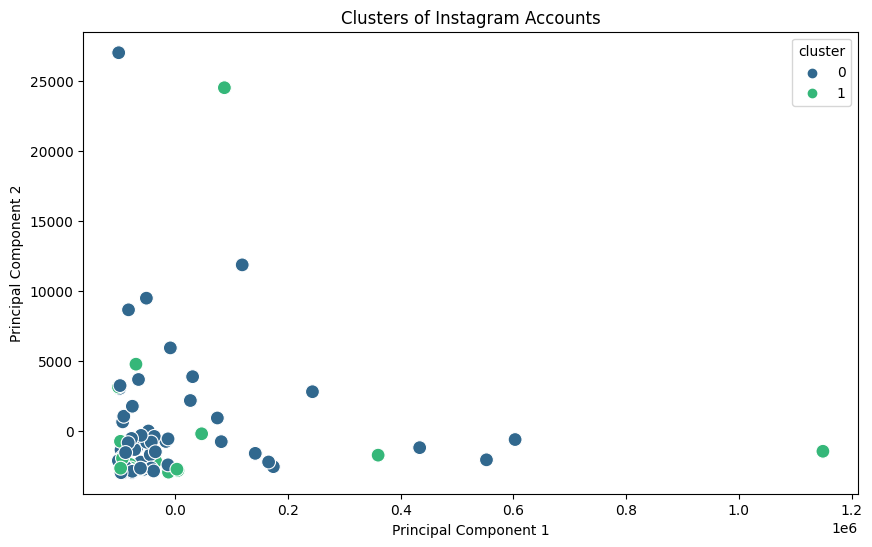

In [169]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(decision_data[features]), columns=['PC1', 'PC2'])

# Add the cluster information to the PCA DataFrame
df_pca['cluster'] = decision_data['cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis', s=100)
plt.title('Clusters of Instagram Accounts')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Correlation plot

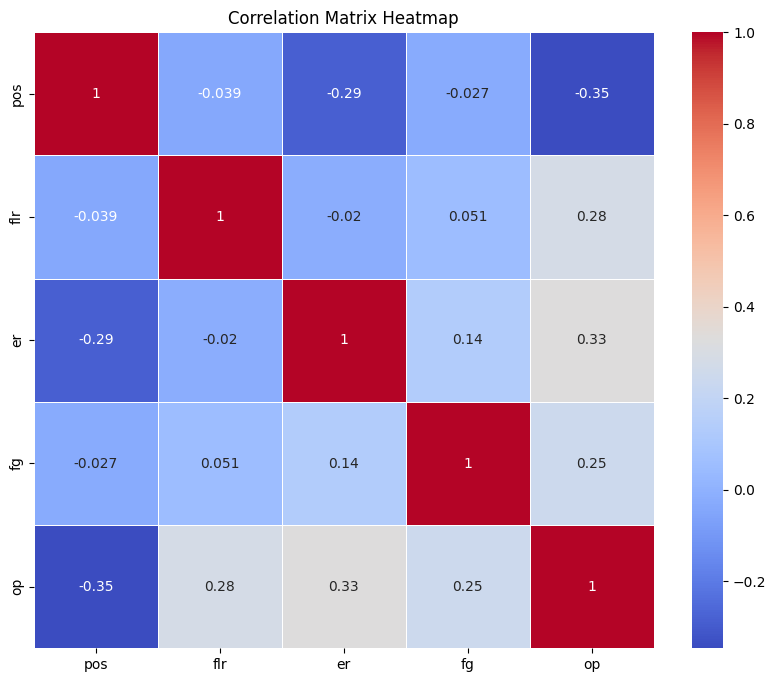

In [170]:
# Calculate the correlation matrix
correlation_matrix = decision_data[features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [171]:
decision_data = decision_data.drop(['eg'], axis=1)

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.60      1.00      0.75         3

    accuracy                           0.92        24
   macro avg       0.80      0.95      0.85        24
weighted avg       0.95      0.92      0.93        24



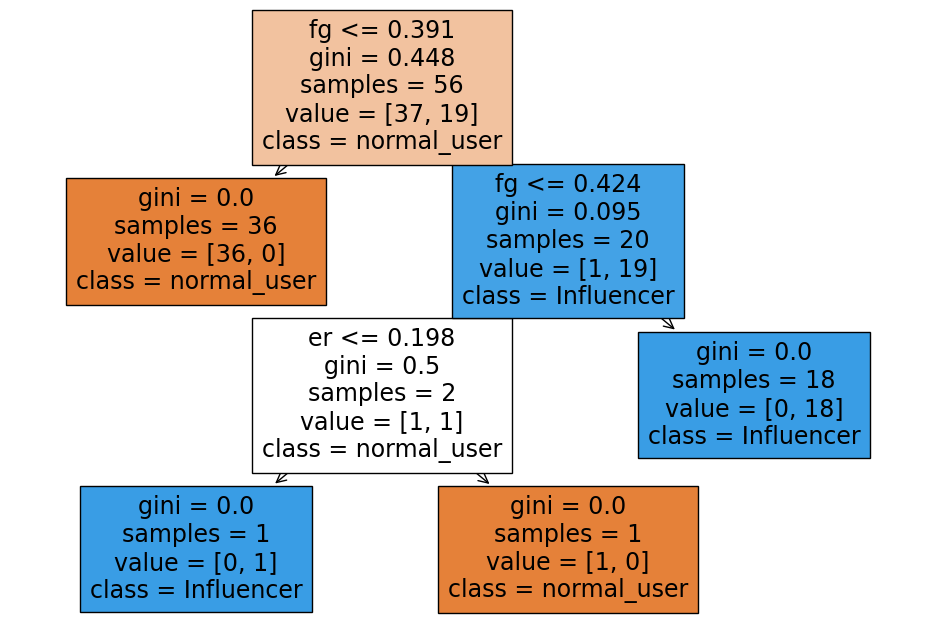

In [182]:
# Split the data into features (X) and target variable (y)
X = decision_data[['pos','flr', 'fg', 'er', 'op']]
y = decision_data['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['normal_user', 'Influencer'], filled=True)
plt.show()

In [183]:
new_input = {
    'pos': [600],
    'flr': [5500],
    'fg': [0.65],
    'er': [0.26],
    'op': [0.56],
}


# Convert the input to a DataFrame
new_df = pd.DataFrame(new_input)

# Make a prediction using the trained model
prediction = clf.predict(new_df)

# Print the predicted class
if prediction[0] == 0:
    print("Predicted class: Normal User")
else:
    print("Predicted class: Influencer")

Predicted class: Influencer
